# Titanic EDA - Task 5: Data Analyst Internship

This notebook performs Exploratory Data Analysis (EDA) on the Titanic dataset to uncover patterns related to survival.

# 1. Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# 2. Load Dataset

In [3]:
train = pd.read_csv("train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 3. Understand the Data

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Observations:**
- Dataset contains 891 passengers with 12 features
- Significant missing values in Age (177) and Cabin (687)
- Embarked has 2 missing values

In [4]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
train.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

# 4. Univariate Analysis

## Categorical Features

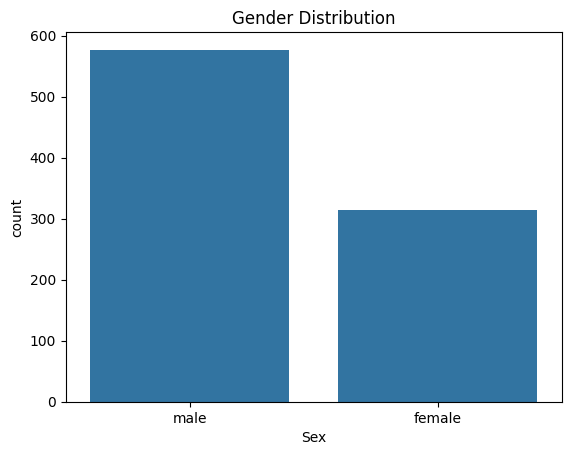

In [7]:
sns.countplot(x='Sex', data=train)
plt.title('Gender Distribution')
plt.show()

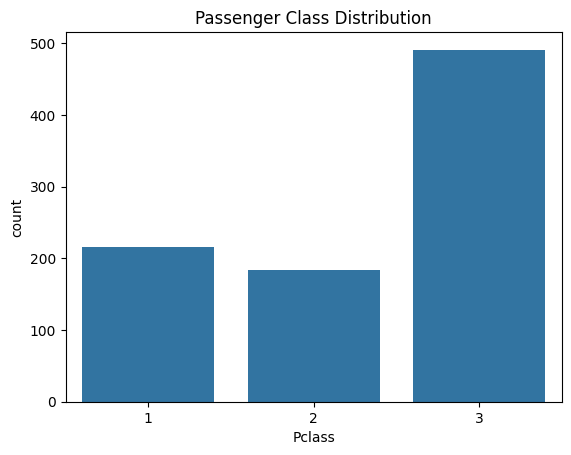

In [8]:
sns.countplot(x='Pclass', data=train)
plt.title('Passenger Class Distribution')
plt.show()

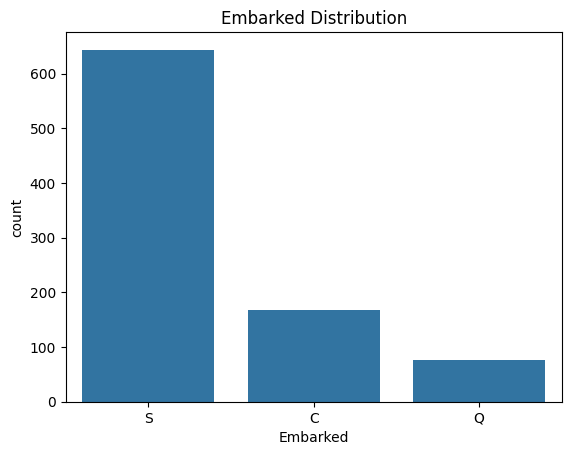

In [9]:
sns.countplot(x='Embarked', data=train)
plt.title('Embarked Distribution')
plt.show()

## Numerical Features

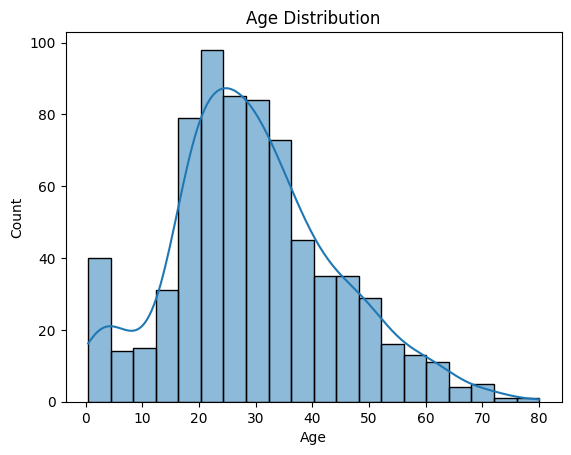

In [10]:
sns.histplot(train['Age'].dropna(), kde=True)
plt.title('Age Distribution')
plt.show()

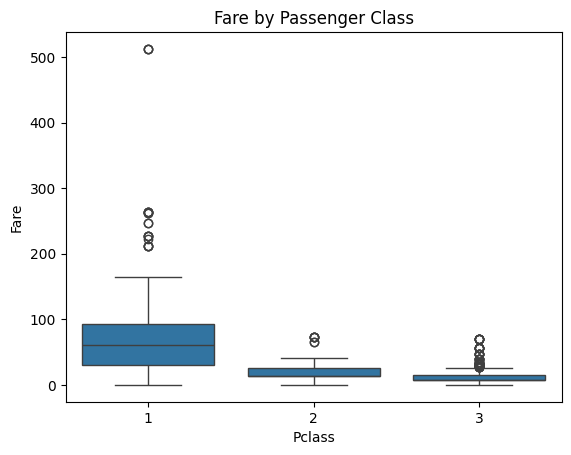

In [15]:
sns.boxplot(x='Pclass', y='Fare', data=train)
plt.title('Fare by Passenger Class')
plt.show()

**Observations:**
- Majority of passengers are male.
- Most passengers are in 3rd class.,
- Age distribution is right-skewed with some older passengers.
- Fare varies significantly by passenger class.

# 5. Bivariate Analysis

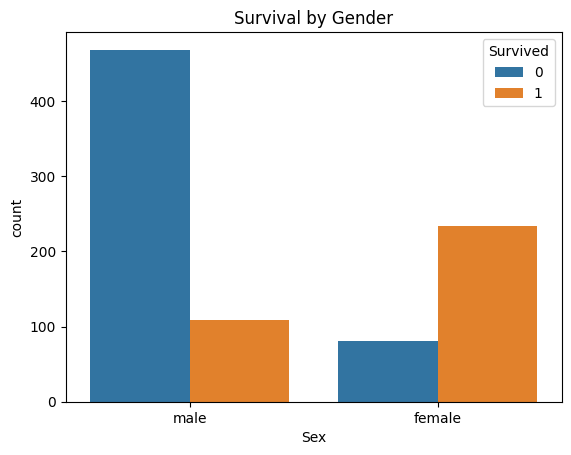

In [4]:
sns.countplot(x='Sex', hue='Survived', data=train)
plt.title('Survival by Gender')
plt.show()

**Observation:** Females had a much higher survival rate than males.

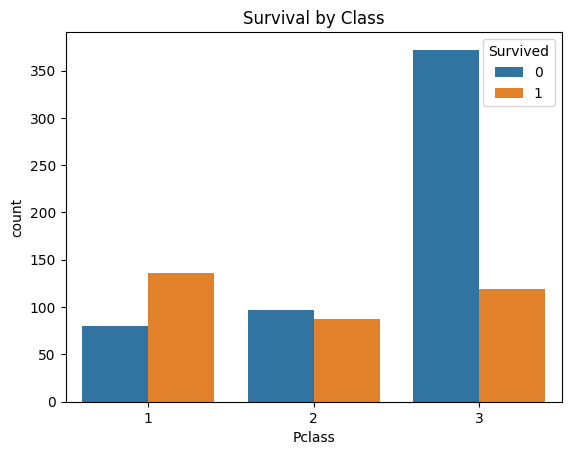

In [5]:
sns.countplot(x='Pclass', hue='Survived', data=train)
plt.title('Survival by Class')
plt.show()

**Observation:** Survival rate was highest for 1st class passengers and lowest for 3rd class.

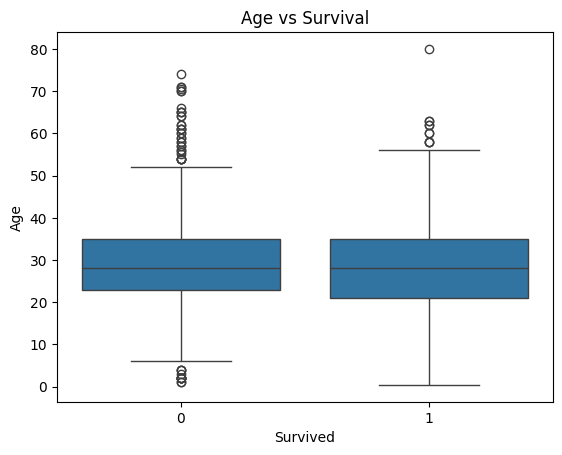

In [14]:
sns.boxplot(x='Survived', y='Age', data=train)
plt.title('Age vs Survival')
plt.show()

**Observation:** Younger passengers had a higher survival rate.

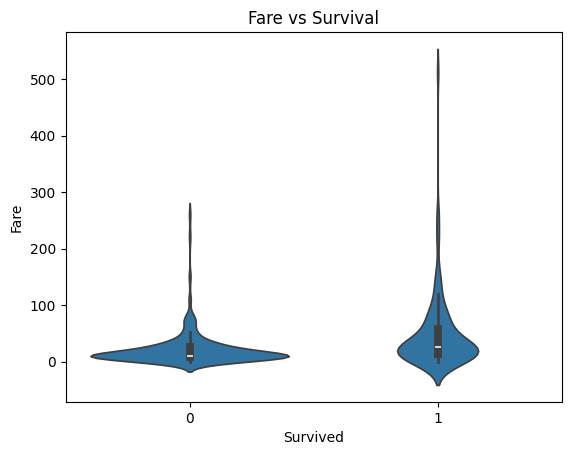

In [16]:
sns.violinplot(x='Survived', y='Fare', data=train)
plt.title('Fare vs Survival')
plt.show()

# 6. Multivariate Analysis

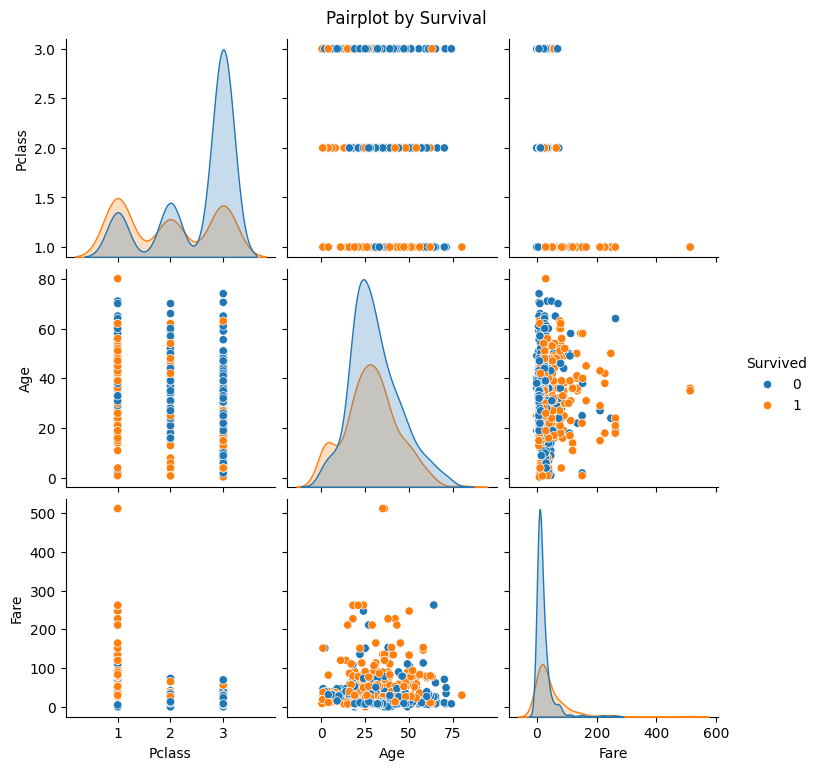

In [8]:
sns.pairplot(train[['Survived', 'Pclass', 'Age', 'Fare']], hue='Survived')
plt.suptitle('Pairplot by Survival', y=1.02)
plt.show()

**Observation:** Some correlation between fare and class, and survival clusters visible.

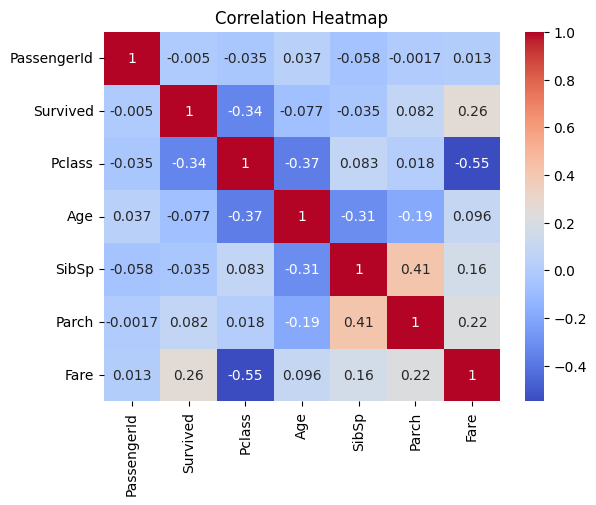

In [9]:
sns.heatmap(train.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

**Observation:** Strong negative correlation between Pclass and Fare, moderate positive correlation between Fare and Survived.

# 7. Handle Missing Values

In [10]:
train['Age'].fillna(train['Age'].median(), inplace=True)
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)

### Observations:
- Most passengers are in 3rd class.
- Passengers in 1st class had the highest survival rate, while 3rd class had the lowest.
- Females had higher survival rates than males.
- Younger passengers had higher survival probability.
- Passengers with higher fare had better survival odds.
- Age and Fare distributions are slightly skewed.
- There is a strong negative correlation between passenger class and fare, and a moderate positive correlation between fare and survival.
